In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/sample_submission.csv
/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/wheet_test.csv
/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/wheet_train.csv


## Reading the datasets

In [2]:
df_train = pd.read_csv("/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/wheet_train.csv")
df_test = pd.read_csv("/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/wheet_test.csv")

## Analysying the train dataset

In [3]:
df_train.head()

,ID,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.,Type
0,1,18.59,16.05,0.9066,6.037,3.860,6.001,5.877,2
1,2,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3
2,3,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
3,4,15.38,14.90,0.8706,5.884,3.268,4.462,5.795,2
4,5,19.15,16.45,0.8890,6.245,3.815,3.084,6.185,2


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    140 non-null    int64  
 1   area                  140 non-null    float64
 2   perimeter             140 non-null    float64
 3   compactness           140 non-null    float64
 4   kernelLength          140 non-null    float64
 5   kernelWidth           140 non-null    float64
 6   asymmetryCoefficient  140 non-null    float64
 7   kernelGrooveLength.   140 non-null    float64
 8   Type                  140 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 10.0 KB


In [5]:
df_train.corr()

,ID,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.,Type
ID,1.000000,-0.060870,-0.047059,-0.113844,-0.007439,-0.066899,-0.014867,-0.036654,-0.030905
area,-0.060870,1.000000,0.993936,0.618421,0.946361,0.969466,-0.271647,0.861363,-0.388750
perimeter,-0.047059,0.993936,1.000000,0.537243,0.969843,0.942110,-0.266027,0.890112,-0.376535
compactness,-0.113844,0.618421,0.537243,1.000000,0.368590,0.772758,-0.311632,0.221165,-0.515699
kernelLength,-0.007439,0.946361,0.969843,0.368590,1.000000,0.851641,-0.225251,0.936122,-0.303241
kernelWidth,-0.066899,0.969466,0.942110,0.772758,0.851641,1.000000,-0.280802,0.741591,-0.450539
asymmetryCoefficient,-0.014867,-0.271647,-0.266027,-0.311632,-0.225251,-0.280802,1.000000,-0.055192,0.614652
kernelGrooveLength.,-0.036654,0.861363,0.890112,0.221165,0.936122,0.741591,-0.055192,1.000000,-0.026355
Type,-0.030905,-0.388750,-0.376535,-0.515699,-0.303241,-0.450539,0.614652,-0.026355,1.000000


In [6]:
df_train.describe()

,ID,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.,Type
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,14.795214,14.531071,0.871806,5.619950,3.256829,3.763266,5.393529,2.021429
std,40.5586,2.825813,1.264163,0.023107,0.435769,0.370524,1.611004,0.477433,0.835092
min,1.0000,10.740000,12.570000,0.808100,4.981000,2.641000,0.765100,4.605000,1.000000
25%,35.7500,12.345000,13.467500,0.857300,5.259000,2.959000,2.642000,5.036000,1.000000
50%,70.5000,14.315000,14.285000,0.872600,5.488500,3.243500,3.721500,5.219500,2.000000
75%,105.2500,16.922500,15.655000,0.888075,5.979000,3.531750,4.833000,5.795000,3.000000
max,140.0000,21.180000,17.210000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## Plotting the correlation

<Axes: >

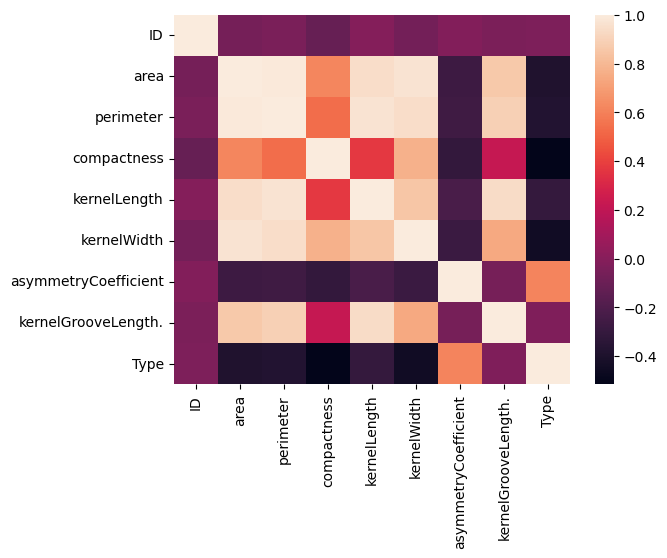

In [7]:
import seaborn as sns
import matplotlib as plt
sns.heatmap(df_train.corr()) #Correlation among the attributes

In [8]:
cvals = df_train.corr()['Type'] #Correlation w.r.t Target variable
cvals 

ID                     -0.030905
area                   -0.388750
perimeter              -0.376535
compactness            -0.515699
kernelLength           -0.303241
kernelWidth            -0.450539
asymmetryCoefficient    0.614652
kernelGrooveLength.    -0.026355
Type                    1.000000
Name: Type, dtype: float64

## Data pre-processing

In [9]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = df_train.drop(["Type","ID"],axis = "columns")
X.head()

,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.
0,18.59,16.05,0.9066,6.037,3.860,6.001,5.877
1,11.18,12.72,0.8680,5.009,2.810,4.051,4.828
2,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
3,15.38,14.90,0.8706,5.884,3.268,4.462,5.795
4,19.15,16.45,0.8890,6.245,3.815,3.084,6.185


In [10]:
y = df_train['Type']
X = scale.fit_transform(X,y)
# X

## K-Fold

In [11]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)

In [12]:
from sklearn.svm import SVC
svc = SVC()

## Using GridSearch for Cross Validation

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['linear', 'rbf','sigmoid', 'poly'], 'C':[0.5, 1, 3, 4, 5, 7, 10],'random_state': [x for x in range(1, 11)]}
gscv = GridSearchCV(svc, parameters,cv=skf)
gscv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.5, 1, 3, 4, 5, 7, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [14]:
print("Best parameters are",gscv.best_params_)

Best parameters are {'C': 4, 'kernel': 'poly', 'random_state': 1}


## Accuracy using GridSearchCV Model 

In [15]:
gscv.score(X,y) # This uses the best parameters

0.9928571428571429

## Experimenting with parameters

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.70,test_size=0.30)

In [17]:
from sklearn import svm
clf1 = svm.SVC(kernel="rbf",C=4.5,random_state=3)
clf2 = svm.SVC(kernel="poly",C=6,random_state=11)
clf3 = svm.SVC(kernel="linear",C=2.5,random_state=7)
clf4 = svm.SVC(kernel="rbf",C=4.5,random_state=2)

### Using cross-validation

In [18]:
# Using clf1 classifier 
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf1, Xtrain, ytrain, cv=4)
print(cv_results.keys())
print("Accuracy values: ",cv_results['test_score'])

dict_keys(['fit_time', 'score_time', 'test_score'])
Accuracy values:  [0.8        1.         0.95833333 1.        ]


In [19]:
# Using clf2 classifier 
cv_results = cross_validate(clf2, Xtrain, ytrain, cv=4)
print(cv_results.keys())
print("Accuracy values: ",cv_results['test_score'])

dict_keys(['fit_time', 'score_time', 'test_score'])
Accuracy values:  [0.84       0.88       1.         0.91666667]


In [20]:
# Using clf3 classifier 
cv_results = cross_validate(clf3, Xtrain, ytrain, cv=4)
print(cv_results.keys())
print("Accuracy values: ",cv_results['test_score'])

dict_keys(['fit_time', 'score_time', 'test_score'])
Accuracy values:  [0.84       0.96       0.91666667 0.95833333]


In [21]:
# Using clf4 classifier 
cv_results = cross_validate(clf4, Xtrain, ytrain, cv=4)
print(cv_results.keys())
print("Accuracy values: ",cv_results['test_score'])

dict_keys(['fit_time', 'score_time', 'test_score'])
Accuracy values:  [0.8        1.         0.95833333 1.        ]


In [22]:
# From the above, it is verified that poly and rbf kernels yield better accuracy
# Hence, the GridSearchCV parameters will be 
model = SVC(C= 4, kernel= 'poly', random_state= 1)
model.fit(Xtrain,ytrain)

SVC(C=4, kernel='poly', random_state=1)

## Classification Report

In [23]:
clf2.fit(Xtrain,ytrain)

SVC(C=6, kernel='poly', random_state=11)

In [24]:
from sklearn.metrics import classification_report
preds = clf2.predict(Xtest)
print(classification_report(ytest,preds))

              precision    recall  f1-score   support

           1       0.92      0.80      0.86        15
           2       0.80      0.92      0.86        13
           3       1.00      1.00      1.00        14

    accuracy                           0.90        42
   macro avg       0.91      0.91      0.90        42
weighted avg       0.91      0.90      0.90        42



## Test Dataset

In [25]:
df_test.head()

,ID,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.
0,1,18.85,16.17,0.9056,6.152,3.806,2.843,6.200
1,2,11.34,12.87,0.8596,5.053,2.849,3.347,5.003
2,3,14.86,14.67,0.8676,5.678,3.258,2.129,5.351
3,4,12.67,13.32,0.8977,4.984,3.135,2.300,4.745
4,5,11.82,13.40,0.8274,5.314,2.777,4.471,5.178


In [26]:
Xtest = df_test.drop(["ID"],axis="columns") #Droppping ID attribute

In [27]:
Xtest.head()

,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.
0,18.85,16.17,0.9056,6.152,3.806,2.843,6.200
1,11.34,12.87,0.8596,5.053,2.849,3.347,5.003
2,14.86,14.67,0.8676,5.678,3.258,2.129,5.351
3,12.67,13.32,0.8977,4.984,3.135,2.300,4.745
4,11.82,13.40,0.8274,5.314,2.777,4.471,5.178


In [28]:
Xtest = scale.transform(Xtest)  #Transforming test dataset

In [29]:
test_preds = clf2.predict(Xtest)

In [30]:
output = pd.DataFrame({"ID":df_test['ID'],"Type":test_preds})
output.to_csv('submission.csv',index=False)
print(output)

    ID  Type
0    1     2
1    2     3
2    3     1
3    4     3
4    5     3
..  ..   ...
65  66     1
66  67     2
67  68     3
68  69     2
69  70     1

[70 rows x 2 columns]
